In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('data/dls_raw_combined_cleaned.xlsx')

In [3]:
df

,record,type,sample,date,temp,z-aver,pdi,peak1_mean_int,peak2_mean_int,peak3_mean_int,...,c_dna_g_l,c_ha_g_l,record_zeta,type_zeta,sample_zeta,date_zeta,temp_zeta,zp,mob,cond
0,8,Size,0.25DNACHIT 1,11. huhtikuuta 2024 12:53:16,25.0,83.82,0.219,101.8,3121.0,0,...,0.122,0.00,5.0,Zeta,0.25DNACHIT 1,11. huhtikuuta 2024 12:39:12,25.0,-20.00,-0.9939,0.537
1,9,Size,0.25DNACHIT 2,11. huhtikuuta 2024 12:55:49,25.0,84.61,0.199,104.2,0.0,0,...,0.122,0.00,6.0,Zeta,0.25DNACHIT 2,11. huhtikuuta 2024 12:40:59,25.0,-21.50,-1.0650,0.562
2,10,Size,0.25DNACHIT 3,11. huhtikuuta 2024 12:58:22,25.0,85.40,0.210,100.5,5169.0,0,...,0.122,0.00,7.0,Zeta,0.25DNACHIT 3,11. huhtikuuta 2024 12:41:47,25.0,-25.10,-1.2480,0.574
3,14,Size,0.5DNACHIT 1,11. huhtikuuta 2024 13:28:35,25.0,93.75,0.148,112.1,0.0,0,...,0.108,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,Size,0.5DNACHIT 2,11. huhtikuuta 2024 13:30:37,25.0,92.29,0.141,107.5,0.0,0,...,0.108,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,306,Size,3(6.5) 2,6. toukokuuta 2024 13:33:31,25.0,189.40,0.233,247.4,0.0,0,...,0.010,0.25,320.0,Zeta,3(6.5) 2,6. toukokuuta 2024 14:15:49,25.0,15.40,1.2040,0.513
122,307,Size,3(6.5) 3,6. toukokuuta 2024 13:35:34,25.0,189.30,0.260,258.1,0.0,0,...,0.010,0.25,321.0,Zeta,3(6.5) 3,6. toukokuuta 2024 14:16:28,25.1,17.10,1.3410,0.520
123,325,Size,4(6.5) 1,6. toukokuuta 2024 14:35:02,25.1,3487.00,1.000,396.1,0.0,0,...,0.010,0.05,322.0,Zeta,4(6.5) 1,6. toukokuuta 2024 14:24:20,25.0,4.87,0.3815,0.401
124,326,Size,4(6.5) 2,6. toukokuuta 2024 14:37:05,25.0,3100.00,1.000,420.8,0.0,0,...,0.010,0.05,323.0,Zeta,4(6.5) 2,6. toukokuuta 2024 14:25:48,25.1,5.14,0.4030,0.410


In [4]:
df.columns


Index(['record', 'type', 'sample', 'date', 'temp', 'z-aver', 'pdi',
       'peak1_mean_int', 'peak2_mean_int', 'peak3_mean_int', 'peak1_area_int',
       'peak2_area_int', 'peak3_area_int', 'scattering_angle', 'c_sr3_g_l',
       'c_dna_g_l', 'c_ha_g_l', 'record_zeta', 'type_zeta', 'sample_zeta',
       'date_zeta', 'temp_zeta', 'zp', 'mob', 'cond'],
      dtype='object')

In [5]:
df['cs_dna_mass'] = df['c_sr3_g_l']/df['c_dna_g_l']
df['ha_cs_mass'] = df['c_ha_g_l']/df['c_sr3_g_l']
df['np'] = df['cs_dna_mass']*1.66
df['ha_cs_nn']=df['ha_cs_mass']/2.35
df['min_plus_ratio']=df['c_dna_g_l']/df['c_sr3_g_l']/1.66+df['ha_cs_mass']/2.35
df

,record,type,sample,date,temp,z-aver,pdi,peak1_mean_int,peak2_mean_int,peak3_mean_int,...,date_zeta,temp_zeta,zp,mob,cond,cs_dna_mass,ha_cs_mass,np,ha_cs_nn,min_plus_ratio
0,8,Size,0.25DNACHIT 1,11. huhtikuuta 2024 12:53:16,25.0,83.82,0.219,101.8,3121.0,0,...,11. huhtikuuta 2024 12:39:12,25.0,-20.00,-0.9939,0.537,0.150000,0.0,0.249000,0.000000,4.016064
1,9,Size,0.25DNACHIT 2,11. huhtikuuta 2024 12:55:49,25.0,84.61,0.199,104.2,0.0,0,...,11. huhtikuuta 2024 12:40:59,25.0,-21.50,-1.0650,0.562,0.150000,0.0,0.249000,0.000000,4.016064
2,10,Size,0.25DNACHIT 3,11. huhtikuuta 2024 12:58:22,25.0,85.40,0.210,100.5,5169.0,0,...,11. huhtikuuta 2024 12:41:47,25.0,-25.10,-1.2480,0.574,0.150000,0.0,0.249000,0.000000,4.016064
3,14,Size,0.5DNACHIT 1,11. huhtikuuta 2024 13:28:35,25.0,93.75,0.148,112.1,0.0,0,...,NaN,NaN,NaN,NaN,NaN,0.299074,0.0,0.496463,0.000000,2.014249
4,15,Size,0.5DNACHIT 2,11. huhtikuuta 2024 13:30:37,25.0,92.29,0.141,107.5,0.0,0,...,NaN,NaN,NaN,NaN,NaN,0.299074,0.0,0.496463,0.000000,2.014249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,306,Size,3(6.5) 2,6. toukokuuta 2024 13:33:31,25.0,189.40,0.233,247.4,0.0,0,...,6. toukokuuta 2024 14:15:49,25.0,15.40,1.2040,0.513,10.000000,2.5,16.600000,1.063830,1.124071
122,307,Size,3(6.5) 3,6. toukokuuta 2024 13:35:34,25.0,189.30,0.260,258.1,0.0,0,...,6. toukokuuta 2024 14:16:28,25.1,17.10,1.3410,0.520,10.000000,2.5,16.600000,1.063830,1.124071
123,325,Size,4(6.5) 1,6. toukokuuta 2024 14:35:02,25.1,3487.00,1.000,396.1,0.0,0,...,6. toukokuuta 2024 14:24:20,25.0,4.87,0.3815,0.401,10.000000,0.5,16.600000,0.212766,0.273007
124,326,Size,4(6.5) 2,6. toukokuuta 2024 14:37:05,25.0,3100.00,1.000,420.8,0.0,0,...,6. toukokuuta 2024 14:25:48,25.1,5.14,0.4030,0.410,10.000000,0.5,16.600000,0.212766,0.273007


In [6]:
df.columns

Index(['record', 'type', 'sample', 'date', 'temp', 'z-aver', 'pdi',
       'peak1_mean_int', 'peak2_mean_int', 'peak3_mean_int', 'peak1_area_int',
       'peak2_area_int', 'peak3_area_int', 'scattering_angle', 'c_sr3_g_l',
       'c_dna_g_l', 'c_ha_g_l', 'record_zeta', 'type_zeta', 'sample_zeta',
       'date_zeta', 'temp_zeta', 'zp', 'mob', 'cond', 'cs_dna_mass',
       'ha_cs_mass', 'np', 'ha_cs_nn', 'min_plus_ratio'],
      dtype='object')

In [7]:
df = df[['sample', 'z-aver', 'c_sr3_g_l', 'c_dna_g_l', 'c_ha_g_l', 'zp', 'cs_dna_mass', 'ha_cs_mass', 'np', 'ha_cs_nn', 'min_plus_ratio']]

In [8]:
df

,sample,z-aver,c_sr3_g_l,c_dna_g_l,c_ha_g_l,zp,cs_dna_mass,ha_cs_mass,np,ha_cs_nn,min_plus_ratio
0,0.25DNACHIT 1,83.82,0.0183,0.122,0.00,-20.00,0.150000,0.0,0.249000,0.000000,4.016064
1,0.25DNACHIT 2,84.61,0.0183,0.122,0.00,-21.50,0.150000,0.0,0.249000,0.000000,4.016064
2,0.25DNACHIT 3,85.40,0.0183,0.122,0.00,-25.10,0.150000,0.0,0.249000,0.000000,4.016064
3,0.5DNACHIT 1,93.75,0.0323,0.108,0.00,NaN,0.299074,0.0,0.496463,0.000000,2.014249
4,0.5DNACHIT 2,92.29,0.0323,0.108,0.00,NaN,0.299074,0.0,0.496463,0.000000,2.014249
...,...,...,...,...,...,...,...,...,...,...,...
121,3(6.5) 2,189.40,0.1000,0.010,0.25,15.40,10.000000,2.5,16.600000,1.063830,1.124071
122,3(6.5) 3,189.30,0.1000,0.010,0.25,17.10,10.000000,2.5,16.600000,1.063830,1.124071
123,4(6.5) 1,3487.00,0.1000,0.010,0.05,4.87,10.000000,0.5,16.600000,0.212766,0.273007
124,4(6.5) 2,3100.00,0.1000,0.010,0.05,5.14,10.000000,0.5,16.600000,0.212766,0.273007


In [9]:
df['sample'] = df['sample'].str.slice(0, -2)

/tmp/ipykernel_35248/2579537269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sample'] = df['sample'].str.slice(0, -2)


In [10]:
df = df.groupby('sample').mean().reset_index()

In [11]:
df.head()

,sample,z-aver,c_sr3_g_l,c_dna_g_l,c_ha_g_l,zp,cs_dna_mass,ha_cs_mass,np,ha_cs_nn,min_plus_ratio
0,0.25DNACHIT,84.610000,0.0183,0.122,0.0000,-22.200000,0.150000,0.000000,0.249000,0.000000,4.016064
1,0.25HASR3,231.200000,0.0440,0.000,0.0259,14.733333,NaN,0.588636,NaN,0.250484,0.250484
2,0.5DNACHIT,93.090000,0.0323,0.108,0.0000,NaN,0.299074,0.000000,0.496463,0.000000,2.014249
3,0.5HASR3,221.033333,0.0322,0.000,0.0378,8.856667,NaN,1.173913,NaN,0.499537,0.499537
4,1(3.5),159.100000,0.1000,0.040,0.0000,16.566667,2.500000,0.000000,4.150000,0.000000,0.240964


In [12]:
df['particle_type'] = df.apply(lambda x: 'cs_ha' if x['c_dna_g_l'] == 0 else ('cs_dna' if x['c_ha_g_l'] == 0 else 'cs_ha_dna'), axis = 1)

In [13]:
df

,sample,z-aver,c_sr3_g_l,c_dna_g_l,c_ha_g_l,zp,cs_dna_mass,ha_cs_mass,np,ha_cs_nn,min_plus_ratio,particle_type
0,0.25DNACHIT,84.610000,0.01830,0.1220,0.0000,-22.200000,0.150000,0.000000,0.249000,0.000000,4.016064,cs_dna
1,0.25HASR3,231.200000,0.04400,0.0000,0.0259,14.733333,NaN,0.588636,NaN,0.250484,0.250484,cs_ha
2,0.5DNACHIT,93.090000,0.03230,0.1080,0.0000,NaN,0.299074,0.000000,0.496463,0.000000,2.014249,cs_dna
3,0.5HASR3,221.033333,0.03220,0.0000,0.0378,8.856667,NaN,1.173913,NaN,0.499537,0.499537,cs_ha
4,1(3.5),159.100000,0.10000,0.0400,0.0000,16.566667,2.500000,0.000000,4.150000,0.000000,0.240964,cs_dna
5,1(4/26),138.100000,0.10000,0.0670,0.1000,-12.766667,1.492537,1.000000,2.477612,0.425532,0.829146,cs_ha_dna
6,1(6.5),2177.000000,0.10000,0.0400,0.2500,-13.400000,2.500000,2.500000,4.150000,1.063830,1.304794,cs_ha_dna
7,"1,5HASR3",919.500000,0.01550,0.0000,0.0545,-0.126000,NaN,3.516129,NaN,1.496225,1.496225,cs_ha
8,10(4/26),253.533333,0.10000,0.0200,0.7500,-24.500000,5.000000,7.500000,8.300000,3.191489,3.311971,cs_ha_dna
9,1DNACHIT,121.466667,0.05250,0.0875,0.0000,-15.733333,0.600000,0.000000,0.996000,0.000000,1.004016,cs_dna


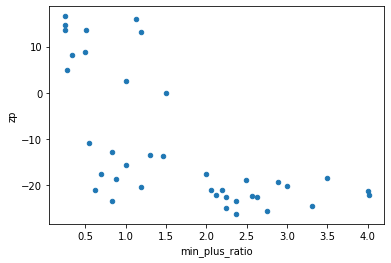

In [17]:
df.plot.scatter('min_plus_ratio', 'zp')
plt.show()

In [54]:
df = df.query('c_dna_g_l > 0 and c_ha_g_l > 0')

In [ ]:
df.plot.scatter('min_plus_ratio', 'z-aver')
plt.show()

In [58]:
df

,sample,z-aver,c_sr3_g_l,c_dna_g_l,c_ha_g_l,zp,cs_dna_mass,ha_cs_mass,np,ha_cs_nn,min_plus_ratio,particle_type
5,1(4/26),138.100000,0.1,0.0670,0.100,-12.766667,1.492537,1.00,2.477612,0.425532,0.829146,cs_ha_dna
6,1(6.5),2177.000000,0.1,0.0400,0.250,-13.400000,2.500000,2.50,4.150000,1.063830,1.304794,cs_ha_dna
8,10(4/26),253.533333,0.1,0.0200,0.750,-24.500000,5.000000,7.50,8.300000,3.191489,3.311971,cs_ha_dna
10,1DNASR3HA,218.933333,0.1,0.0400,0.470,-24.933333,2.500000,4.70,4.150000,2.000000,2.240964,cs_ha_dna
12,2(3.5),1541.666667,0.1,0.0670,0.050,-21.033333,1.492537,0.50,2.477612,0.212766,0.616380,cs_ha_dna
13,2(4/26),1084.866667,0.1,0.0200,0.100,-10.886667,5.000000,1.00,8.300000,0.425532,0.546014,cs_ha_dna
14,2(6.5),212.100000,0.1,0.0200,0.250,13.233333,5.000000,2.50,8.300000,1.063830,1.184312,cs_ha_dna
17,2DNASR3HA,252.100000,0.1,0.0400,0.500,-26.266667,2.500000,5.00,4.150000,2.127660,2.368623,cs_ha_dna
19,3(3.5),1908.333333,0.1,0.0200,0.050,8.283333,5.000000,0.50,8.300000,0.212766,0.333248,cs_ha_dna
20,3(4/26),751.133333,0.1,0.0400,0.150,-18.633333,2.500000,1.50,4.150000,0.638298,0.879262,cs_ha_dna


In [ ]:
df.to_csv('out.csv', sep=';', encoding='utf-8')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['min_plus_ratio'], df['zp'], alpha=0.5)
plt.show()

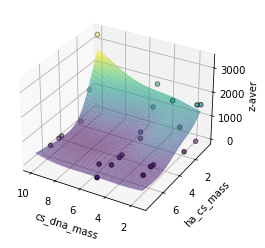

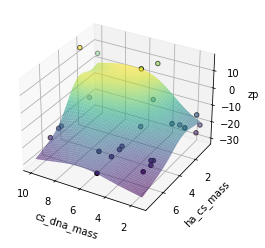

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import Rbf

# Assuming you have a dataframe 'df' with columns 'cs_dna_mass', 'ha_cs_mass', and 'z-aver'
# df = pd.read_csv('your_dataframe.csv')



# Extract the columns into numpy arrays
x = df['cs_dna_mass'].values
y = df['ha_cs_mass'].values
z = df['z-aver'].values

# Create a grid to evaluate the RBF
xi = np.linspace(min(x), max(x), 200)
yi = np.linspace(min(y), max(y), 200)
xi, yi = np.meshgrid(xi, yi)

# Fit RBF
rbf = Rbf(x, y, z, function='multiquadric', smooth=0.3)
zi = rbf(xi, yi)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.6)

# Plot the original points
ax.scatter(x, y, z,  c=z, cmap='viridis', edgecolor='k')

# Set the view angle
ax.view_init(elev=30, azim=120)

# Labeling the axes
ax.set_xlabel('cs_dna_mass')
ax.set_ylabel('ha_cs_mass')
ax.set_zlabel('z-aver')

plt.show()

# Second plot with 'zp' as z-axis
z2 = df['zp'].values

# Fit RBF for the second plot
rbf2 = Rbf(x, y, z2, function='multiquadric', smooth=0.3)
zi2 = rbf2(xi, yi)

# Create the second plot
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

# Plot the surface
ax2.plot_surface(xi, yi, zi2, cmap='viridis', alpha=0.6)

# Plot the original points
ax2.scatter(x, y, z2, c=z2, cmap='viridis', edgecolor='k')

# Set the view angle
ax2.view_init(elev=30, azim=120)

# Labeling the axes
ax2.set_xlabel('cs_dna_mass')
ax2.set_ylabel('ha_cs_mass')
ax2.set_zlabel('zp')

plt.show()


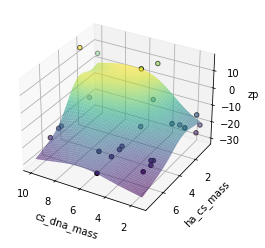

In [26]:
# Extract the columns into numpy arrays
x = df['cs_dna_mass'].values
y = df['ha_cs_mass'].values
z = df['zp'].values

# Create a grid to evaluate the RBF
xi = np.linspace(min(x), max(x), 200)
yi = np.linspace(min(y), max(y), 200)
xi, yi = np.meshgrid(xi, yi)

# Fit RBF
rbf = Rbf(x, y, z, function='multiquadric', smooth=0.3)
zi = rbf(xi, yi)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.6)

# Plot the original points
ax.scatter(x, y, z,  c=z, cmap='viridis', edgecolor='k')

# Set the view angle
ax.view_init(elev=30, azim=120)

# Labeling the axes
ax.set_xlabel('cs_dna_mass')
ax.set_ylabel('ha_cs_mass')
ax.set_zlabel('zp')

plt.show()

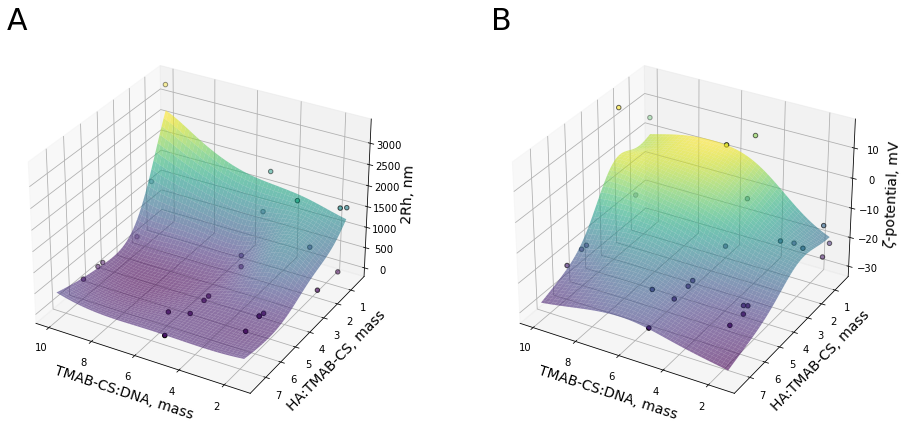

In [56]:
x = df['cs_dna_mass'].values
y = df['ha_cs_mass'].values

# First plot with 'z-aver' as z-axis
z1 = df['z-aver'].values

# Create a grid to evaluate the RBF
xi = np.linspace(min(x), max(x), 200)
yi = np.linspace(min(y), max(y), 200)
xi, yi = np.meshgrid(xi, yi)

# Fit RBF for the first plot
rbf1 = Rbf(x, y, z1, function='multiquadric', smooth=0.3)
zi1 = rbf1(xi, yi)

# Second plot with 'zp' as z-axis
z2 = df['zp'].values

# Fit RBF for the second plot
rbf2 = Rbf(x, y, z2, function='multiquadric', smooth=0.3)
zi2 = rbf2(xi, yi)

# Create the figure and subplots
fig = plt.figure(figsize=(14, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xi, yi, zi1, cmap='viridis', alpha=0.6)
ax1.scatter(x, y, z1, c=z1, cmap='viridis', edgecolor='k')
ax1.view_init(elev=30, azim=120)
ax1.set_xlabel('TMAB-CS:DNA, mass', fontsize = 14)
ax1.set_ylabel('HA:TMAB-CS, mass', fontsize = 14)
ax1.set_zlabel('2Rh, nm', fontsize = 14)
ax1.set_title('A', loc='left', fontsize = 30)

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xi, yi, zi2, cmap='viridis', alpha=0.6)
ax2.scatter(x, y, z2, c=z2, cmap='viridis', edgecolor='k')
ax2.view_init(elev=30, azim=120)
ax2.set_xlabel('TMAB-CS:DNA, mass', fontsize = 14)
ax2.set_ylabel('HA:TMAB-CS, mass', fontsize = 14)
ax2.set_zlabel('$\zeta$-potential, mV', fontsize = 14)
ax2.set_title('B', loc='left', fontsize = 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.savefig('output/3dplots.png', facecolor='white')

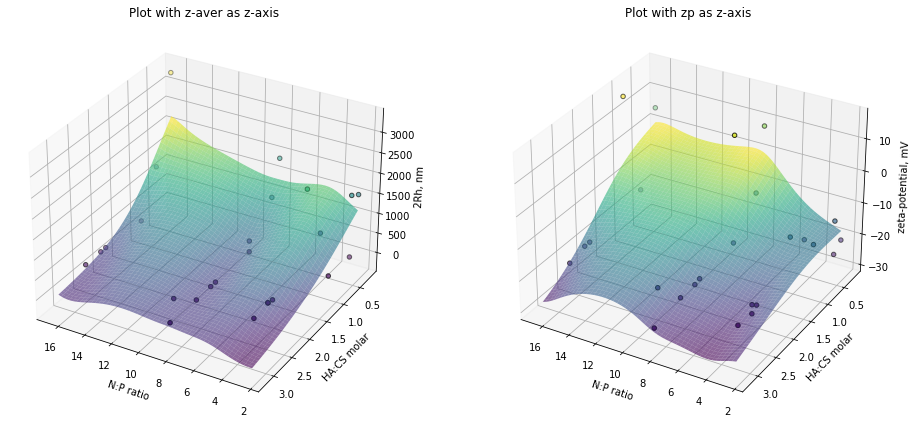

In [34]:
x = df['np'].values
y = df['ha_cs_nn'].values

# First plot with 'z-aver' as z-axis
z1 = df['z-aver'].values

# Create a grid to evaluate the RBF
xi = np.linspace(min(x), max(x), 200)
yi = np.linspace(min(y), max(y), 200)
xi, yi = np.meshgrid(xi, yi)

# Fit RBF for the first plot
rbf1 = Rbf(x, y, z1, function='multiquadric', smooth=0.3)
zi1 = rbf1(xi, yi)

# Second plot with 'zp' as z-axis
z2 = df['zp'].values

# Fit RBF for the second plot
rbf2 = Rbf(x, y, z2, function='multiquadric', smooth=0.3)
zi2 = rbf2(xi, yi)

# Create the figure and subplots
fig = plt.figure(figsize=(14, 6))

# First subplot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xi, yi, zi1, cmap='viridis', alpha=0.6)
ax1.scatter(x, y, z1, c=z1, cmap='viridis', edgecolor='k')
ax1.view_init(elev=30, azim=120)
ax1.set_xlabel('N:P ratio')
ax1.set_ylabel('HA:CS molar')
ax1.set_zlabel('2Rh, nm')
ax1.set_title('Plot with z-aver as z-axis')

# Second subplot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xi, yi, zi2, cmap='viridis', alpha=0.6)
ax2.scatter(x, y, z2, c=z2, cmap='viridis', edgecolor='k')
ax2.view_init(elev=30, azim=120)
ax2.set_xlabel('N:P ratio')
ax2.set_ylabel('HA:CS molar')
ax2.set_zlabel('zeta-potential, mV')
ax2.set_title('Plot with zp as z-axis')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

<AxesSubplot:xlabel='np', ylabel='ha_cs_nn'>

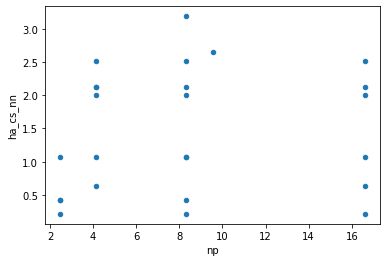

In [61]:
df.plot.scatter('np', 'ha_cs_nn')

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['cs_dna_mass'], df['ha_cs_mass'], df['z-aver'])
plt.show()

In [18]:
df_man = pd.read_csv('data/dls_manual_input.csv', delimiter=';')
for column in df_man.columns:
    df_man[column]=df_man[column].astype(str)
    df_man[column] = df_man[column].str.replace(',', '.')
    df_man[column] = df_man[column].astype(float, errors='ignore')

df_man

,np,Z-ave,angle,note,intensity,date
0,0.25,104.000000,90.0,wyatt,5338.0,11/04/2024
1,0.50,110.000000,90.0,wyatt,11169.0,11/04/2024
2,1.00,146.000000,90.0,wyatt,46359.0,11/04/2024
3,2.00,280.000000,90.0,wyatt,198016.0,11/04/2024
4,4.00,190.000000,90.0,wyatt,79974.0,11/04/2024
5,0.25,84.610000,173.0,malvern,NaN,11/04/2024
6,0.50,93.090000,173.0,malvern,NaN,11/04/2024
7,1.00,121.333333,173.0,malvern,NaN,11/04/2024
8,2.00,245.066667,173.0,malvern,NaN,11/04/2024
9,4.00,166.333333,173.0,malvern,NaN,11/04/2024


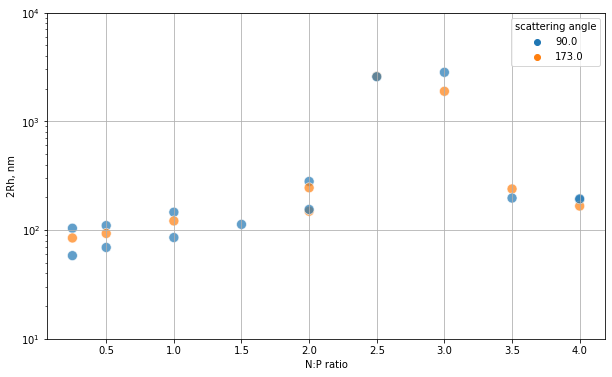

In [19]:
plt.figure(figsize=(10, 6))
#plt.scatter(df_man['np'], df_man['Z-ave'], alpha=0.5, c = df_man['angle'])
scatter = sns.scatterplot(data=df_man, x='np', y='Z-ave', hue='angle',palette='tab10', s=100, alpha=0.7)
plt.legend(title='scattering angle')
plt.yscale('log',base=10)
plt.xlabel('N:P ratio')
plt.ylabel('2Rh, nm')
plt.ylim(10,10000)
plt.grid()
plt.savefig('diameter_sr3_dna.png', facecolor='white')
#plt.show()

In [ ]:
correlograms = pd.read_csv('data/correlograms.csv', delimiter=';')
for column in correlograms.columns:
    correlograms[column] = correlograms[column].str.replace(',', '.')
    correlograms[column]=pd.to_numeric(correlograms[column])
correlograms

In [ ]:
# Step 1: Extract the list of record numbers from df['Records']
record_numbers = df['Record'].tolist()

# Step 2: Filter the columns in correlograms, including 'X Lag Time'
filtered_columns = [col for col in correlograms.columns if 'X Lag Time' in col or any(f'Record {record}: ' in col for record in record_numbers)]

# Step 3: Select only these columns from correlograms
correlograms = correlograms[filtered_columns]

# Step 4: Rename the columns to only the record number, except for 'X Lag Time'
new_column_names = {col: int(col.split()[1].strip(':')) if 'Record' in col else col for col in filtered_columns}
correlograms = correlograms.rename(columns=new_column_names)

In [ ]:
correlograms

In [ ]:
plt.figure(figsize=(12, 8))
for column in correlograms.columns[1:]:
    plt.plot(correlograms['X Lag Time'], correlograms[column], label=column)
plt.xscale('log',base=10)
plt.show()

In [ ]:
size_distrib = pd.read_csv('data/size_distrib.csv', delimiter=';')

size_distrib=size_distrib.astype(str)
size_distrib



In [ ]:
# Replace commas with periods
for column in size_distrib.columns:
    size_distrib[column] = size_distrib[column].str.replace(',', '.')
    size_distrib[column] = size_distrib[column].astype(float)


In [ ]:
size_distrib

In [ ]:
# Step 2: Filter the columns in correlograms, including 'X Lag Time'
filtered_columns = [col for col in size_distrib.columns if 'X Intensity' in col or any(f'Record {record}: ' in col for record in record_numbers)]

# Step 3: Select only these columns from correlograms
size_distrib = size_distrib[filtered_columns]

# Step 4: Rename the columns to only the record number, except for 'X Lag Time'
new_column_names = {col: int(col.split()[1].strip(':')) if 'Record' in col else col for col in filtered_columns}
size_distrib = size_distrib.rename(columns=new_column_names)

In [ ]:
#TODO: convert values to numeric
size_distrib


In [ ]:
plt.figure(figsize=(12, 8))
for column in size_distrib.columns[1:]:
    plt.plot(size_distrib['X Intensity'], size_distrib[column], label=column)
plt.xscale('log',base=10)
plt.show()

In [ ]:
zeta = pd.read_csv('data/zeta.csv', delimiter=';').dropna(axis=0, how = 'all')

In [ ]:
zeta.columns = zeta.columns.str.replace(' ', '')
zeta['ZP,mV']=zeta['ZP,mV'].str.replace(',', '.')
zeta['ZP,mV']=zeta['ZP,mV'].astype(float)
zeta


In [ ]:
zeta.dtypes

In [ ]:
df = pd.merge(df, zeta[['SampleName', 'ZP,mV']], on='SampleName', how='inner')


In [ ]:
df

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['min_plus_ratio'], df['ZP,mV'], alpha=0.3)
plt.show()